In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to C:\Users\Harsh
[nltk_data]     Narayankar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Harsh
[nltk_data]     Narayankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1) Data cleaning
2) DA (data Analysis)
3) Text preprossesing
4) Modle Building
5) Evaluation
6) Improvement

In [7]:
df = pd.read_csv('spam.csv', encoding='latin')

df.sample(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1804,ham,The bus leaves at &lt;#&gt;,NaN,NaN,NaN
903,ham,Lovely smell on this bus and it ain't tobacco...,NaN,NaN,NaN
3811,ham,Yep then is fine 7.30 or 8.30 for ice age.,NaN,NaN,NaN
4615,ham,ÌÏ called dad oredi...,NaN,NaN,NaN
2306,ham,"Aight that'll work, thanks",NaN,NaN,NaN
4793,ham,Sorry that was my uncle. I.ll keep in touch,NaN,NaN,NaN
1806,spam,Todays Voda numbers ending 1225 are selected t...,NaN,NaN,NaN
5208,ham,Hi.what you think about match?,NaN,NaN,NaN
1574,ham,My sis is catching e show in e afternoon so i'...,NaN,NaN,NaN
2449,ham,Then she dun believe wat?,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [10]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.sample(5)

,v1,v2
3189,ham,Hi neva worry bout da truth coz the truth will...
1081,ham,Can u get pic msgs to your phone?
3520,ham,Hey... are you going to quit soon? Xuhui and i...
2917,ham,Thanks chikku..:-) gud nyt:-*
450,ham,hanks lotsly!


In [12]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [13]:
df.sample(5)

,target,text
1199,ham,NEFT Transaction with reference number &lt;#&...
5011,ham,U attend ur driving lesson how many times a wk...
5120,spam,PRIVATE! Your 2003 Account Statement for 078
3285,ham,Not to worry. I'm sure you'll get it.
2200,ham,Haha... can... But i'm having dinner with my c...


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [22]:
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [41]:
df.shape

(5169, 2)

Data Analysis

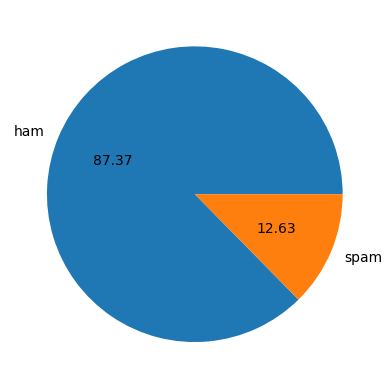

In [26]:
df['target'].value_counts()

plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()


In [45]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


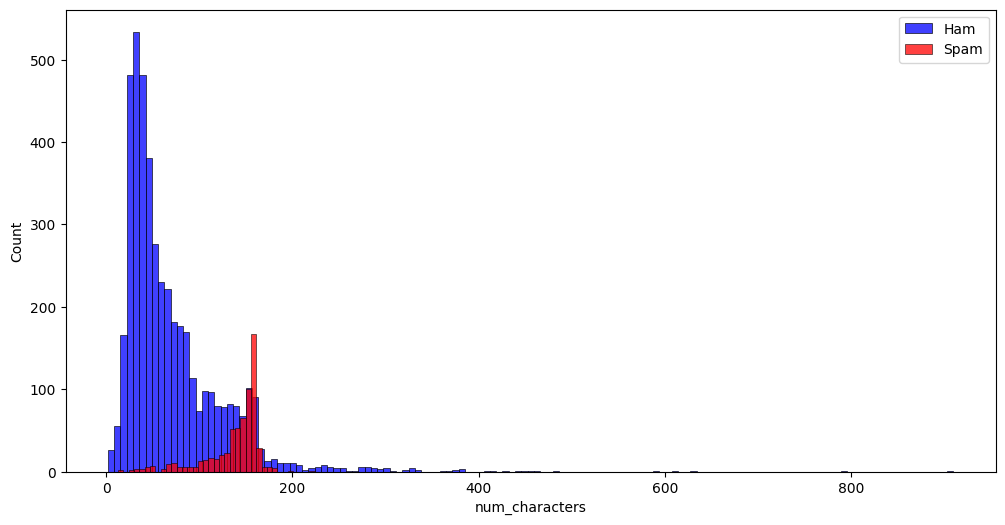

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], label='Ham', color='blue')
sns.histplot(df[df['target'] == 1]['num_characters'], label='Spam', color='red')
plt.legend()
plt.show()


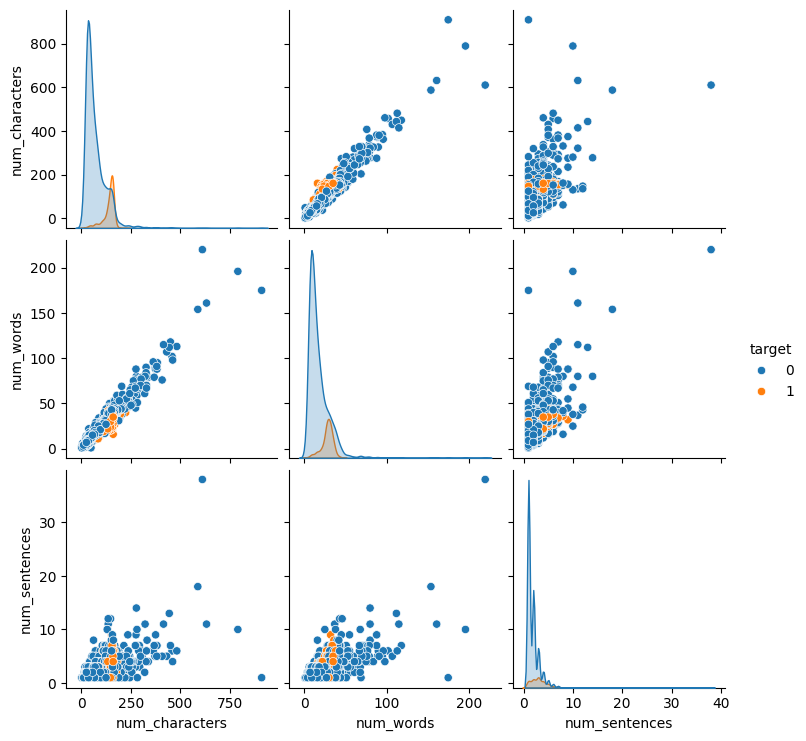

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
sns.pairplot(df, hue='target')
plt.show()

sns.heatmap(df.corr(), annot=True)
plt.show()


In [10]:
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
df['transformed_text'] = df['text'].apply(transform_text)

df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


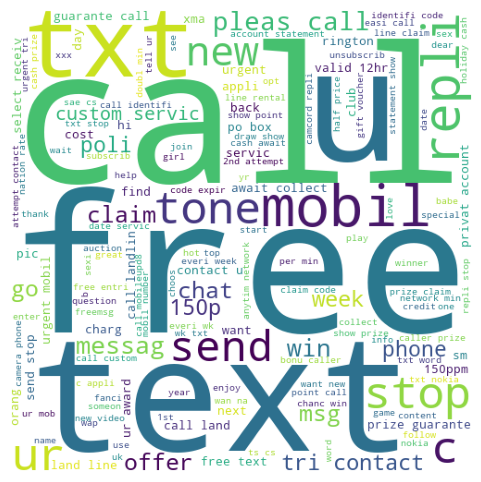

In [11]:
spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(
    df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
)

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()


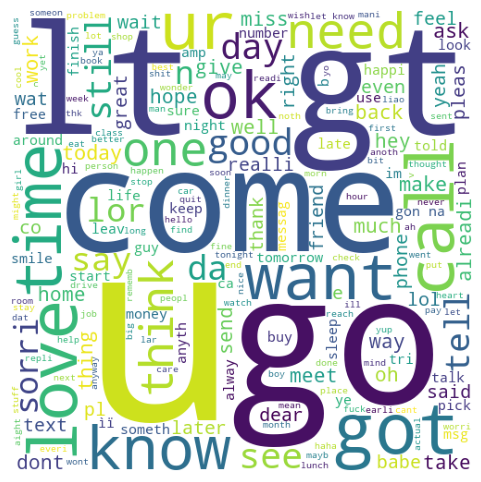

In [12]:
ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(
    df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")
)

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()


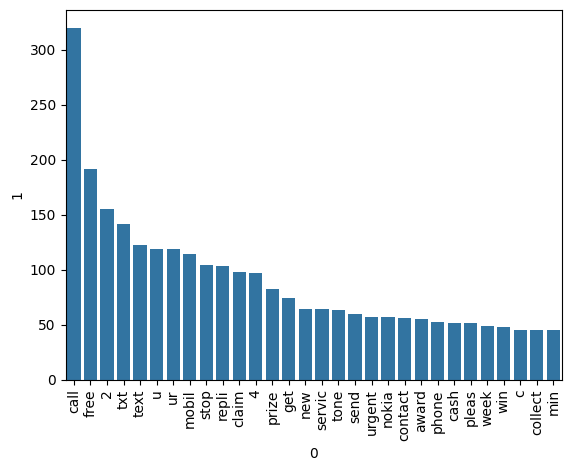

In [13]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text']:
    spam_corpus += msg.split()

df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=df_spam[0], y=df_spam[1])
plt.xticks(rotation='vertical')
plt.show()


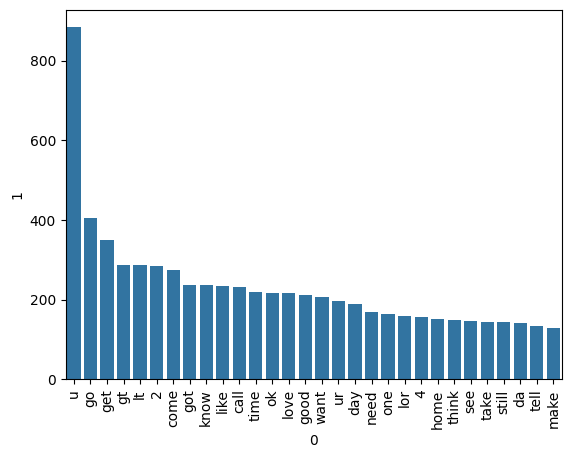

In [14]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    ham_corpus += msg.split()

df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=df_ham[0], y=df_ham[1])
plt.xticks(rotation='vertical')
plt.show()


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

y = df['target'].values

X.shape


(5169, 3000)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Train & Evaluate
models = [gnb, mnb, bnb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-"*50)


GaussianNB
Accuracy: 0.8694390715667312
Precision: 0.5068493150684932
[[788 108]
 [ 27 111]]
--------------------------------------------------
MultinomialNB
Accuracy: 0.9709864603481625
Precision: 1.0
[[896   0]
 [ 30 108]]
--------------------------------------------------
BernoulliNB
Accuracy: 0.9835589941972921
Precision: 0.991869918699187
[[895   1]
 [ 16 122]]
--------------------------------------------------


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC': svc,
    'KNeighbors': knc,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
}

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"{name} -- Accuracy: {current_accuracy:.4f}, Precision: {current_precision:.4f}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

SVC -- Accuracy: 0.9758, Precision: 0.9748
KNeighbors -- Accuracy: 0.9052, Precision: 1.0000
DecisionTree -- Accuracy: 0.9323, Precision: 0.8333
LogisticRegression -- Accuracy: 0.9584, Precision: 0.9703
RandomForest -- Accuracy: 0.9758, Precision: 0.9829
AdaBoost -- Accuracy: 0.9246, Precision: 0.8488


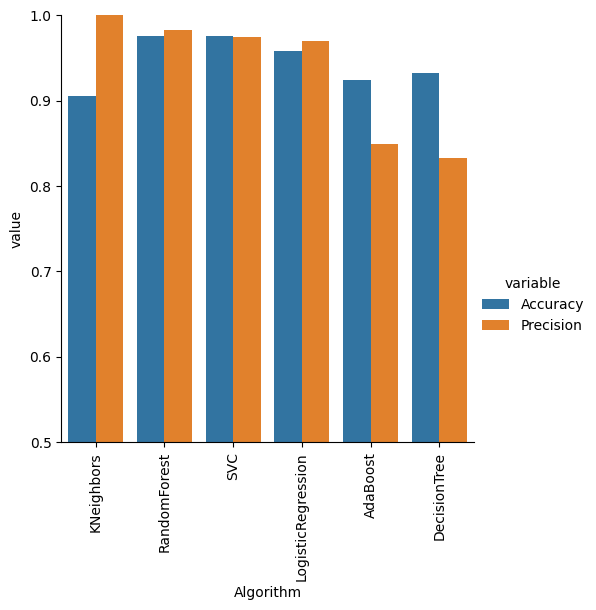

In [21]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

performance_df

performance_df1 = pd.melt(performance_df, id_vars="Algorithm")
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.xticks(rotation='vertical')
plt.ylim(0.5,1)
plt.show()


In [22]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


In [23]:
import pickle

tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))


In [24]:
def predict_sms(input_sms):
    transformed_sms = transform_text(input_sms)

    vector_input = tfidf.transform([transformed_sms]).toarray()

    result = model.predict(vector_input)[0]

    if result == 1:
        return "Spam"
    else:
        return "Ham"


In [25]:
predict_sms("Congratulations! You have won a free ticket to Bahamas. Click here to claim.")


'Spam'

In [26]:
predict_sms("Hey, are we meeting at 5 pm today?")


'Ham'

In [32]:
predict_sms("congradulation you are selected")


'Spam'